In [7]:
from tensorflow.keras.layers import LSTM
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import SimpleRNN
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [8]:

df = pd.read_csv('city_temperature.csv')
data = df['AvgTemperature'].values.reshape(-1, 1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

C:\Users\HP\AppData\Local\Temp\ipykernel_14032\3483109470.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('city_temperature.csv')


In [9]:

X, y = create_sequences(scaled_data, 20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [10]:

lstm_model = Sequential([
    LSTM(64, input_shape=(20, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 611s 8ms/step - loss: 0.3374 - val_loss: 0.1038
Epoch 2/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 659s 9ms/step - loss: 0.3221 - val_loss: 0.1003
Epoch 3/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 634s 9ms/step - loss: 0.3166 - val_loss: 0.0994
Epoch 4/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 748s 10ms/step - loss: 0.3170 - val_loss: 0.0992
Epoch 5/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 978s 13ms/step - loss: 0.3167 - val_loss: 0.1000
Epoch 6/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 913s 13ms/step - loss: 0.3164 - val_loss: 0.0990
Epoch 7/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 930s 13ms/step - loss: 0.3144 - val_loss: 0.0981
Epoch 8/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 928s 13ms/step - loss: 0.3157 - val_loss: 0.0986
Epoch 9/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 1025s 13ms/step - loss: 0.3147 - val_loss: 0.0980
Epoch 10/10
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 945s 13ms/step - loss: 0.3160 - val_loss: 0.0991


In [11]:

lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test)

18165/18165 ━━━━━━━━━━━━━━━━━━━━ 105s 6ms/step


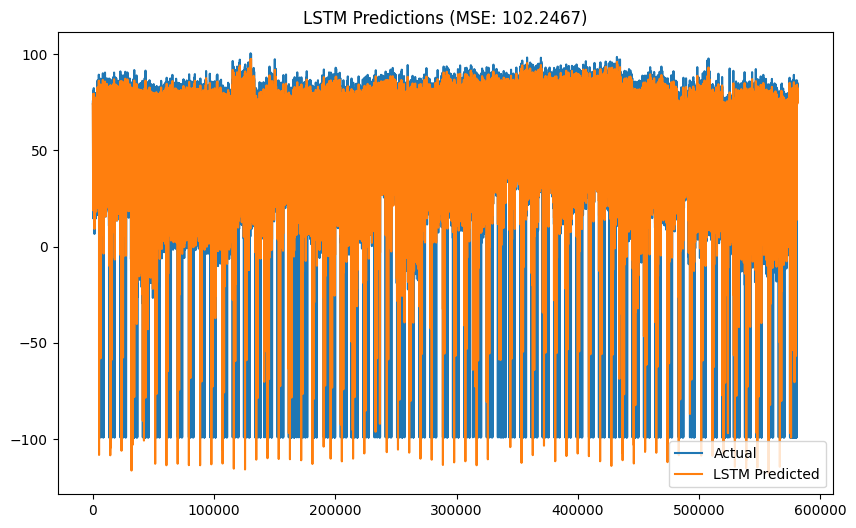

In [12]:

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Predictions (MSE: {np.mean((y_test_actual - lstm_predictions)**2):.4f})")
plt.legend()
plt.show()

In [14]:

print(f"RNN MSE: {np.mean((y_test_actual - lstm_predictions)**2):.4f}")
print(f"LSTM MSE: {np.mean((y_test_actual - lstm_predictions)**2):.4f}")

RNN MSE: 102.2467
LSTM MSE: 102.2467
